In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [2]:
# read Data
df = pd.read_csv(r'C:\Users\acer\Desktop\zzzzz\covid_symptoms.csv')

In [3]:
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   566602 non-null  object
 1   sex                  566602 non-null  int64 
 2   patient_type         566602 non-null  int64 
 3   entry_date           566602 non-null  object
 4   date_symptoms        566602 non-null  object
 5   date_died            566602 non-null  object
 6   intubed              566602 non-null  int64 
 7   pneumonia            566602 non-null  int64 
 8   age                  566602 non-null  int64 
 9   pregnancy            566602 non-null  int64 
 10  diabetes             566602 non-null  int64 
 11  copd                 566602 non-null  int64 
 12  asthma               566602 non-null  int64 
 13  inmsupr              566602 non-null  int64 
 14  hypertension         566602 non-null  int64 
 15  other_disease        566602 non-nu

In [5]:
df.describe()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
count,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000
mean,1.506726,1.215165,76.562952,1.846262,42.622483,50.400692,2.210633,2.280221,2.265029,2.319628,2.145774,2.410030,2.286157,2.138905,2.283765,2.238360,31.573034,1.728651,76.562864
std,0.499955,0.410937,39.058676,0.560939,16.659973,47.501579,5.683523,5.327832,5.334658,5.667381,5.459866,6.489959,5.438405,5.395578,5.393232,5.571901,45.082123,0.658710,39.059060
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,97.000000,2.000000,31.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,97.000000
50%,2.000000,1.000000,97.000000,2.000000,41.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,97.000000
75%,2.000000,1.000000,97.000000,2.000000,53.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,99.000000,2.000000,97.000000
max,2.000000,2.000000,99.000000,99.000000,120.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,99.000000,3.000000,99.000000


In [6]:
# removing rows with 'covid_res' = 3
df = df.loc[df["covid_res"] != 3 ]

In [7]:
df['covid_res'] = df['covid_res'].astype('category')

In [8]:
#df['covid_res'].replace([1,2,3],[1,0,2],inplace=True)
df['covid_res'].value_counts().to_frame()

,covid_res
2,279035
1,220657


C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='covid_res', ylabel='count'>

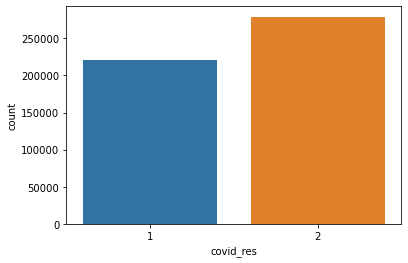

In [9]:
sns.countplot(df['covid_res'])

<AxesSubplot:xlabel='age'>

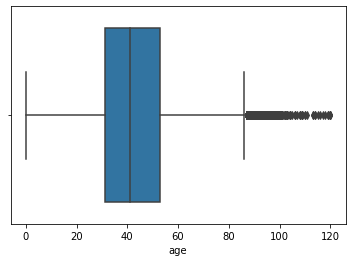

In [10]:
sns.boxplot(x=df['age'], data=df)

**Age column has some outliers. The median age is about 41 years. There are some customers above 90 years of age. This data might have to be checked**

In [11]:
df.corr()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,icu
sex,1.000000,0.098333,-0.098333,-0.054357,0.037737,0.994552,0.009137,0.010862,0.011646,0.009217,0.010245,0.011260,0.010027,0.011422,0.009995,0.006048,-0.002511,-0.098326
patient_type,0.098333,1.000000,-0.999241,-0.411624,0.324000,0.096809,0.005049,0.017329,0.020724,0.020365,0.002691,0.033577,0.020574,0.019339,0.016951,0.020333,0.231217,-0.999235
intubed,-0.098333,-0.999241,1.000000,0.412543,-0.323790,-0.096813,-0.005200,-0.017482,-0.020875,-0.020434,-0.002851,-0.033753,-0.020735,-0.019490,-0.017112,-0.020482,-0.231097,0.999988
pneumonia,-0.054357,-0.411624,0.412543,1.000000,-0.179262,-0.053689,-0.004118,-0.010641,-0.012143,-0.013025,-0.002758,-0.022032,-0.012438,-0.012100,-0.010152,-0.011768,-0.074436,0.412467
age,0.037737,0.324000,-0.323790,-0.179262,1.000000,0.037475,-0.002739,0.011791,0.016181,0.016444,-0.012475,0.016344,0.012625,0.009339,0.014066,0.015216,0.097757,-0.323710
pregnancy,0.994552,0.096809,-0.096813,-0.053689,0.037475,1.000000,0.015910,0.018184,0.019048,0.016293,0.017463,0.017283,0.017257,0.018537,0.017086,0.012918,-0.003961,-0.096806
diabetes,0.009137,0.005049,-0.005200,-0.004118,-0.002739,0.015910,1.000000,0.827140,0.836437,0.778381,0.829978,0.669706,0.808832,0.748220,0.805772,0.764150,0.004916,-0.005168
copd,0.010862,0.017329,-0.017482,-0.010641,0.011791,0.018184,0.827140,1.000000,0.916414,0.852379,0.862561,0.731763,0.882360,0.811650,0.879197,0.831148,0.012390,-0.017417
asthma,0.011646,0.020724,-0.020875,-0.012143,0.016181,0.019048,0.836437,0.916414,1.000000,0.875275,0.876354,0.742226,0.898938,0.825612,0.895297,0.846003,0.012971,-0.020818
inmsupr,0.009217,0.020365,-0.020434,-0.013025,0.016444,0.016293,0.778381,0.852379,0.875275,1.000000,0.830608,0.790437,0.859473,0.784130,0.852614,0.806427,0.012583,-0.020287


In [12]:
#histograms from the pair plots
#sns.pairplot(df)

In [13]:
df['patient_type'].value_counts()

1    392146
2    107546
Name: patient_type, dtype: int64

In [14]:
df['contact_other_covid'].value_counts()

1     196966
99    153675
2     149051
Name: contact_other_covid, dtype: int64

In [15]:
df['icu'].value_counts()

97    392146
2      98414
1       9009
99       123
Name: icu, dtype: int64

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='patient_type', ylabel='count'>

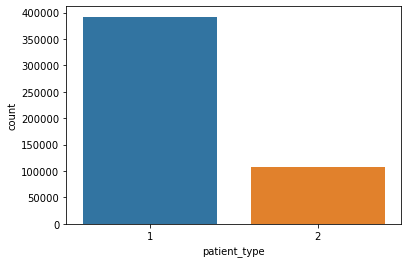

In [16]:
sns.countplot(df['patient_type'])

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hypertension', ylabel='count'>

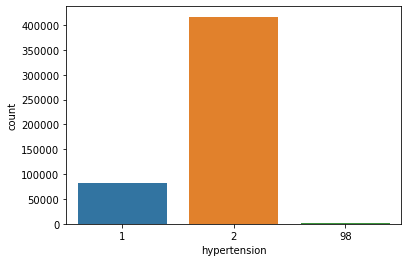

In [17]:
sns.countplot(df['hypertension'])

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pneumonia', ylabel='count'>

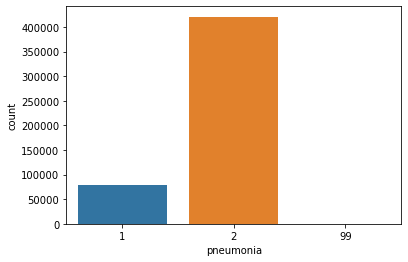

In [18]:
sns.countplot(df['pneumonia'])

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='asthma', ylabel='count'>

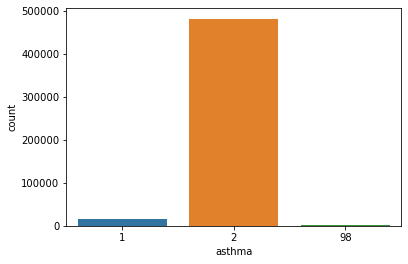

In [19]:
sns.countplot(df['asthma'])

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tobacco', ylabel='count'>

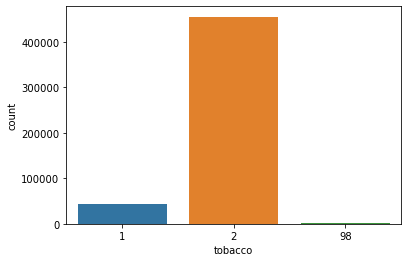

In [20]:
sns.countplot(df['tobacco'])

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='obesity', ylabel='count'>

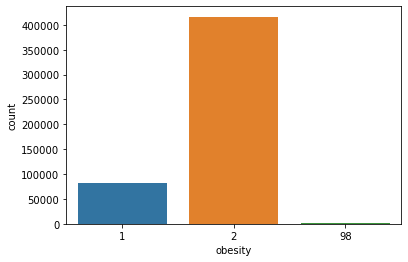

In [21]:
sns.countplot(df['obesity'])

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='other_disease', ylabel='count'>

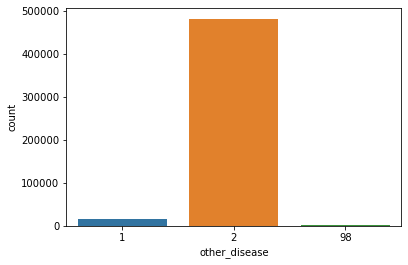

In [22]:
sns.countplot(df['other_disease'])

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

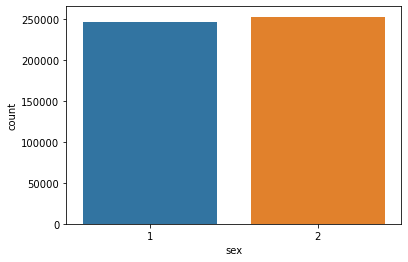

In [23]:
sns.countplot(df['sex'])

In [24]:
df['covid_res'].value_counts(normalize=True)

2    0.558414
1    0.441586
Name: covid_res, dtype: float64

In [25]:
# Bivariate Analysis

np.round(df.groupby(["covid_res"]).mean() ,1)

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,icu
covid_res,,,,,,,,,,,,,,,,,,
1,1.5,1.3,67.6,1.8,45.7,54.3,2.2,2.3,2.3,2.4,2.1,2.5,2.3,2.2,2.3,2.3,37.3,67.6
2,1.5,1.1,83.6,1.9,40.1,47.3,2.2,2.2,2.2,2.3,2.1,2.3,2.2,2.1,2.2,2.2,26.8,83.6


In [26]:
pd.crosstab(df['asthma'], df['covid_res'], normalize='index').sort_values(by= 1,ascending=False )

covid_res,1,2
asthma,,
98,0.536061,0.463939
2,0.443579,0.556421
1,0.373936,0.626064


In [27]:
pd.crosstab(df['pneumonia'], df['covid_res'], normalize='index').sort_values(by= 1,ascending=False )

covid_res,1,2
pneumonia,,
1,0.673700,0.326300
2,0.398187,0.601813
99,0.272727,0.727273


In [28]:
pd.crosstab(df['diabetes'], df['covid_res'], normalize='index').sort_values(by= 1,ascending=False )

covid_res,1,2
diabetes,,
1,0.580394,0.419606
98,0.519196,0.480804
2,0.421430,0.578570


# Binning


In [29]:
#Binning:
def binning(col, cut_points, labels=None):
  #Define min and max values:
  minval = col.min()
  maxval = col.max()

  #create list by adding min and max to cut_points
  break_points = [minval] + cut_points + [maxval]

  #if no labels provided, use default labels 0 ... (n-1)
  if not labels:
    labels = range(len(cut_points)+1)

  #Binning using cut function of pandas
  colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
  return colBin

In [30]:
# Binning Age
cut_points = [18,65]
labels = ["children/teenagers","adults","old age"]
df["age_range"] = binning(df["age"],cut_points, labels)
df["age_range"].value_counts()

adults                428200
old age                47569
children/teenagers     23923
Name: age_range, dtype: int64

In [31]:
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,age_range
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,1,97,adults
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,99,1,97,adults
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,...,2,2,2,1,2,2,99,1,2,adults
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,99,1,2,adults
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,1,2,1,2,2,2,99,1,2,adults


In [32]:
#df['age'] = df['age'].astype('category')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499692 entries, 0 to 499691
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   id                   499692 non-null  object  
 1   sex                  499692 non-null  int64   
 2   patient_type         499692 non-null  int64   
 3   entry_date           499692 non-null  object  
 4   date_symptoms        499692 non-null  object  
 5   date_died            499692 non-null  object  
 6   intubed              499692 non-null  int64   
 7   pneumonia            499692 non-null  int64   
 8   age                  499692 non-null  int64   
 9   pregnancy            499692 non-null  int64   
 10  diabetes             499692 non-null  int64   
 11  copd                 499692 non-null  int64   
 12  asthma               499692 non-null  int64   
 13  inmsupr              499692 non-null  int64   
 14  hypertension         499692 non-null  int64   
 15  

In [34]:
df.sample(20)

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,age_range
430776,12c75f,1,1,04-06-2020,03-06-2020,9999-99-99,97,2,56,2,...,2,2,2,2,2,2,99,2,97,adults
218490,04efcd,2,2,23-05-2020,16-05-2020,9999-99-99,2,1,61,97,...,1,2,2,2,2,2,1,1,1,adults
491883,57261,1,1,21-05-2020,19-05-2020,9999-99-99,97,2,39,2,...,2,2,2,1,2,2,99,2,97,adults
418189,01890a,1,1,24-06-2020,22-06-2020,9999-99-99,97,2,37,2,...,2,2,2,2,2,2,99,2,97,adults
320369,1.75E+08,1,1,12-06-2020,09-06-2020,9999-99-99,97,2,65,2,...,2,2,2,2,2,2,1,2,97,adults
453291,1c5aab,2,1,09-05-2020,05-05-2020,9999-99-99,97,2,33,97,...,2,2,2,2,2,2,1,2,97,adults
312403,0a96af,1,1,26-03-2020,22-03-2020,9999-99-99,97,2,32,2,...,2,1,2,2,2,2,2,2,97,adults
16167,081e8b,1,1,22-06-2020,13-06-2020,9999-99-99,97,1,35,2,...,2,2,2,1,2,2,1,1,97,adults
142816,173f79,2,1,19-06-2020,15-06-2020,9999-99-99,97,2,56,97,...,2,2,2,2,2,2,2,1,97,adults
139885,03b41a,2,2,23-04-2020,15-04-2020,9999-99-99,1,1,28,97,...,2,2,2,2,2,2,99,1,1,adults


In [35]:
df.columns

Index(['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu', 'age_range'],
      dtype='object')

In [36]:
#df.drop(["age"], axis = 1, inplace = True)
#df.columns

In [37]:
#df['covid_res'] = df['age_range'].astype('float')
#df = df.age_range(convert_numeric=True)

In [38]:
df.drop(['age'], axis = 1, inplace = True)
df.columns

Index(['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'pneumonia', 'pregnancy', 'diabetes', 'copd', 'asthma',
       'inmsupr', 'hypertension', 'other_disease', 'cardiovascular', 'obesity',
       'renal_chronic', 'tobacco', 'contact_other_covid', 'covid_res', 'icu',
       'age_range'],
      dtype='object')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499692 entries, 0 to 499691
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   id                   499692 non-null  object  
 1   sex                  499692 non-null  int64   
 2   patient_type         499692 non-null  int64   
 3   entry_date           499692 non-null  object  
 4   date_symptoms        499692 non-null  object  
 5   date_died            499692 non-null  object  
 6   intubed              499692 non-null  int64   
 7   pneumonia            499692 non-null  int64   
 8   pregnancy            499692 non-null  int64   
 9   diabetes             499692 non-null  int64   
 10  copd                 499692 non-null  int64   
 11  asthma               499692 non-null  int64   
 12  inmsupr              499692 non-null  int64   
 13  hypertension         499692 non-null  int64   
 14  other_disease        499692 non-null  int64   
 15  

In [40]:
dummies_age = pd.get_dummies(df.age_range)
dummies_age

,children/teenagers,adults,old age
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
499687,0,0,1
499688,0,1,0
499689,0,1,0
499690,0,1,0


In [41]:
merged_df = pd.concat([df,dummies_age], axis = 'columns')
merged_df

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,pregnancy,diabetes,...,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,age_range,children/teenagers,adults,old age
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,97,2,...,2,2,2,2,1,97,adults,0,1,0
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,97,2,...,2,2,2,99,1,97,adults,0,1,0
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,2,2,...,1,2,2,99,1,2,adults,0,1,0
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,97,2,...,2,2,2,99,1,2,adults,0,1,0
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,2,1,...,2,2,2,99,1,2,adults,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499687,1342ee,2,1,26-03-2020,20-03-2020,9999-99-99,97,1,97,2,...,2,2,1,2,2,97,old age,0,0,1
499688,0186c8,2,2,28-03-2020,23-03-2020,9999-99-99,1,1,97,2,...,1,2,1,2,2,2,adults,0,1,0
499689,130373,1,1,16-03-2020,13-03-2020,9999-99-99,97,2,2,2,...,2,2,2,2,2,97,adults,0,1,0
499690,10b265,1,1,27-03-2020,25-03-2020,9999-99-99,97,2,2,2,...,2,2,2,1,2,97,adults,0,1,0


In [42]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499692 entries, 0 to 499691
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   id                   499692 non-null  object  
 1   sex                  499692 non-null  int64   
 2   patient_type         499692 non-null  int64   
 3   entry_date           499692 non-null  object  
 4   date_symptoms        499692 non-null  object  
 5   date_died            499692 non-null  object  
 6   intubed              499692 non-null  int64   
 7   pneumonia            499692 non-null  int64   
 8   pregnancy            499692 non-null  int64   
 9   diabetes             499692 non-null  int64   
 10  copd                 499692 non-null  int64   
 11  asthma               499692 non-null  int64   
 12  inmsupr              499692 non-null  int64   
 13  hypertension         499692 non-null  int64   
 14  other_disease        499692 non-null  int64   
 15  

In [43]:
merged_df.drop(['age_range'], axis = 1, inplace = True)
merged_df.columns

#final = merged_df.drop(['age_range'], axis = 1, inplace = True)
#final

Index(['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'pneumonia', 'pregnancy', 'diabetes', 'copd', 'asthma',
       'inmsupr', 'hypertension', 'other_disease', 'cardiovascular', 'obesity',
       'renal_chronic', 'tobacco', 'contact_other_covid', 'covid_res', 'icu',
       'children/teenagers', 'adults', 'old age'],
      dtype='object')

In [44]:
merged_df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,pregnancy,diabetes,...,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,children/teenagers,adults,old age
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,97,2,...,2,2,2,2,2,1,97,0,1,0
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,97,2,...,2,2,2,2,99,1,97,0,1,0
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,2,2,...,2,1,2,2,99,1,2,0,1,0
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,97,2,...,2,2,2,2,99,1,2,0,1,0
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,2,1,...,1,2,2,2,99,1,2,0,1,0


In [45]:
#merged_df.columns = merged_df.columns.to_series().apply(lambda x: x.strip())

In [46]:
X = merged_df[['sex','intubed','pneumonia',
       'diabetes','copd','asthma','hypertension',
       'cardiovascular', 'obesity', 'renal_chronic',
       'tobacco', 'contact_other_covid', 'icu','children/teenagers', 'adults', 'old age']]

In [47]:
y = df['covid_res']
y

0         1
1         1
2         1
3         1
4         1
         ..
499687    2
499688    2
499689    2
499690    2
499691    2
Name: covid_res, Length: 499692, dtype: category
Categories (2, int64): [1, 2]

In [48]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [49]:
#instantiating decision tree as the default model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [50]:
# Is the model an overfit model? 

y_pred = dt_model.predict(X_test)
print(dt_model.score(X_train, y_train))
print(dt_model.score(X_test , y_test))

0.6434771173066807
0.6347626544280492


In [51]:
#Confusion matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score

print(confusion_matrix(y_test, y_pred))

print(accuracy_score(y_test, y_pred))


print(recall_score(y_test, y_pred,average="binary", pos_label= 1))

[[24538 41590]
 [13162 70618]]
0.6347626544280492
0.37106823130897654


In [52]:
clf_pruned = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=3, min_samples_leaf=5)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [53]:
# #visualizing tree

# from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO  
# from IPython.display import Image  
# import pydotplus
# import graphviz
# import six
# import sys
# from io import StringIO

# sys.modules['sklearn.externals.six'] = six

# feature_cols = X_train.columns
# dot_data = StringIO()
# export_graphviz(clf_pruned, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True,feature_names = feature_cols,class_names=['0','1'])
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('bank_pruned.png')
# Image(graph.create_png())

In [54]:
## Calculating feature importance

feature_cols = X_train.columns
feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)


feat_imp_dict = dict(zip(feature_cols, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)[0:10] #Top 10 features

,0
intubed,0.622536
children/teenagers,0.161317
pneumonia,0.100424
contact_other_covid,0.094272
sex,0.021450
diabetes,0.000000
copd,0.000000
asthma,0.000000
hypertension,0.000000
cardiovascular,0.000000


In [55]:
preds_pruned = clf_pruned.predict(X_test)
preds_pruned_train = clf_pruned.predict(X_train)

In [56]:
acc_DT = accuracy_score(y_test, preds_pruned)
recall_DT = recall_score(y_test, preds_pruned, average="binary", pos_label= 1)

In [57]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT, 'recall': recall_DT})
resultsDf = resultsDf[['Method', 'accuracy', 'recall']]
resultsDf

,Method,accuracy,recall
0,Decision Tree,0.630367,0.430272


In [58]:
## Apply the Random forest model and print the accuracy of Random forest Model


from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)

In [59]:
pred_RF = rfcl.predict(X_test)
acc_RF = accuracy_score(y_test, pred_RF)
recall_RF = recall_score(y_test, pred_RF, average="binary", pos_label=1)

In [60]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_RF], 'recall': [recall_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy', 'recall']]
resultsDf

,Method,accuracy,recall
0,Decision Tree,0.630367,0.430272
0,Random Forest,0.635390,0.367454


In [61]:
## Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.


from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier( n_estimators= 200, learning_rate=0.1, random_state=22)
abcl = abcl.fit(X_train, y_train)

In [62]:
pred_AB =abcl.predict(X_test)
acc_AB = accuracy_score(y_test, pred_AB)
recall_AB = recall_score(y_test, pred_AB, pos_label=1)

In [63]:
tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy': [acc_AB], 'recall':[recall_AB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy', 'recall']]
resultsDf
resultsDf

,Method,accuracy,recall
0,Decision Tree,0.630367,0.430272
0,Random Forest,0.635390,0.367454
0,Adaboost,0.635270,0.351848


In [64]:
## Apply Bagging Classifier Algorithm and print the accuracy


from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=100, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(X_train, y_train)


In [65]:
pred_BG =bgcl.predict(X_test)
acc_BG = accuracy_score(y_test, pred_BG)
recall_BG = recall_score(y_test, pred_BG, pos_label=1)

In [66]:
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_BG], 'recall':[recall_BG]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy', 'recall']]
resultsDf
resultsDf

,Method,accuracy,recall
0,Decision Tree,0.630367,0.430272
0,Random Forest,0.635390,0.367454
0,Adaboost,0.635270,0.351848
0,Bagging,0.634969,0.367515


In [67]:
from sklearn.ensemble import GradientBoostingClassifier

gbcl = GradientBoostingClassifier(n_estimators = 200, learning_rate = 0.1, random_state=22)
gbcl = gbcl.fit(X_train, y_train)

In [68]:
pred_GB =gbcl.predict(X_test)
acc_GB = accuracy_score(y_test, pred_GB)
recall_GB = recall_score(y_test, pred_GB, pos_label=1)


In [69]:
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'accuracy': [acc_GB], 'recall':[recall_GB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy', 'recall']]
resultsDf
resultsDf

,Method,accuracy,recall
0,Decision Tree,0.630367,0.430272
0,Random Forest,0.635390,0.367454
0,Adaboost,0.635270,0.351848
0,Bagging,0.634969,0.367515
0,Gradient Boost,0.637838,0.418068
